In [16]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model

import pandas as pd
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

class PCA:

  def __init__ (self):
    self.principal_components = np.array([])
    self.mean_ = np.array([])

  
  # Define a function for PCA
  def pca(self, X, num_components):
      # Standardize the data
      self.mean_ = np.mean(X, axis=0)
      X_meaned = X - self.mean_
      
      # Calculate the covariance matrix
      cov_mat = np.cov(X_meaned, rowvar=False)
      
      # Calculate the eigenvalues and eigenvectors
      eigen_values, eigen_vectors = np.linalg.eig(cov_mat)
      
      # Sort the eigenvalues in descending order
      sorted_index = np.argsort(eigen_values)[::-1]
      sorted_eigenvalue = eigen_values[sorted_index]
      
      # Get the top n eigenvectors based on the number of components required
      self.principal_components = eigen_vectors[:,sorted_index][:,:num_components]
      
      # Project the data onto the new reduced dimensionality space
      X_reduced = np.dot(self.principal_components.T, X_meaned.T).T
      
      X_reduced = np.array([c.real for c in X_reduced])
    
      return X_reduced
    
  def pca_reconstruct(self, X_reduced):
      X_reconstructed = np.dot(X_reduced, self.principal_components.T) + self.mean_
      return X_reconstructed
    

In [6]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [31]:
X_train = X_train.reshape(-1, 784)
X_train = X_train.astype(float) / 255.


X_train.shape

(60000, 784)

## For M = 5

In [32]:
model = PCA()
X_R = model.pca(X_train, 5)
X_R.shape

(60000, 4)

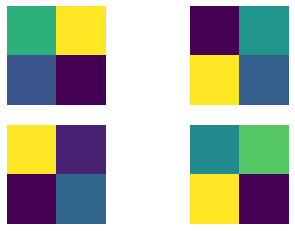

In [34]:
_, ax = plt.subplots(2,2)

ax[0, 0].imshow(X_R[4][:4].reshape(2, 2))
ax[0, 0].set_axis_off()
ax[0, 1].imshow(X_R[5][:4].reshape(2, 2))
ax[0, 1].set_axis_off()

ax[1, 0].imshow(X_R[6][:4].reshape(2, 2))
ax[1, 0].set_axis_off()
ax[1, 1].imshow(X_R[7][:4].reshape(2, 2))
ax[1, 1].set_axis_off()

plt.show()

In [35]:
X_RR = model.pca_reconstruct(X_R)
X_RR.shape

(60000, 784)

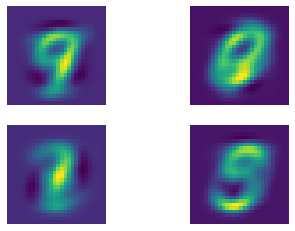

In [36]:
_, ax = plt.subplots(2,2)

ax[0, 0].imshow(X_RR[4].reshape(28, 28))
ax[0, 0].set_axis_off()
ax[0, 1].imshow(X_RR[5].reshape(28, 28))
ax[0, 1].set_axis_off()

ax[1, 0].imshow(X_RR[6].reshape(28, 28))
ax[1, 0].set_axis_off()
ax[1, 1].imshow(X_RR[7].reshape(28, 28))
ax[1, 1].set_axis_off()

plt.show()

In [37]:
print("Mean Square Error: ", mean_squared_error(X_train, X_RR))

Mean Square Error:  4.14438475089567e-26


## For M = 10

In [40]:
model = PCA()
X_R = model.pca(X_train, 10)
X_R.shape

(60000, 10)

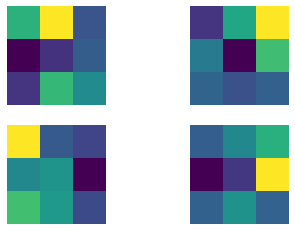

In [41]:
_, ax = plt.subplots(2,2)

ax[0, 0].imshow(X_R[4][:9].reshape(3, 3))
ax[0, 0].set_axis_off()
ax[0, 1].imshow(X_R[5][:9].reshape(3, 3))
ax[0, 1].set_axis_off()

ax[1, 0].imshow(X_R[6][:9].reshape(3, 3))
ax[1, 0].set_axis_off()
ax[1, 1].imshow(X_R[7][:9].reshape(3, 3))
ax[1, 1].set_axis_off()

plt.show()

In [42]:
X_RR = model.pca_reconstruct(X_R)
X_RR.shape

(60000, 784)

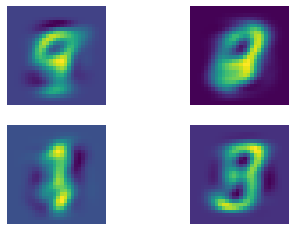

In [43]:
_, ax = plt.subplots(2,2)

ax[0, 0].imshow(X_RR[4].reshape(28, 28))
ax[0, 0].set_axis_off()
ax[0, 1].imshow(X_RR[5].reshape(28, 28))
ax[0, 1].set_axis_off()

ax[1, 0].imshow(X_RR[6].reshape(28, 28))
ax[1, 0].set_axis_off()
ax[1, 1].imshow(X_RR[7].reshape(28, 28))
ax[1, 1].set_axis_off()

plt.show()

In [44]:
print("Mean Square Error: ", mean_squared_error(X_train, X_RR))


Mean Square Error:  2.961023731197904e-26


## For M = 25

In [45]:
model = PCA()
X_R = model.pca(X_train, 25)
X_R.shape

(60000, 25)

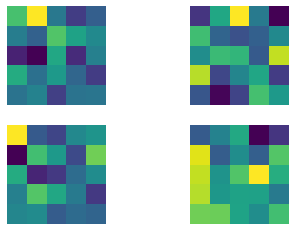

In [46]:
_, ax = plt.subplots(2,2)

ax[0, 0].imshow(X_R[4][:25].reshape(5, 5))
ax[0, 0].set_axis_off()
ax[0, 1].imshow(X_R[5][:25].reshape(5, 5))
ax[0, 1].set_axis_off()

ax[1, 0].imshow(X_R[6][:25].reshape(5, 5))
ax[1, 0].set_axis_off()
ax[1, 1].imshow(X_R[7][:25].reshape(5, 5))
ax[1, 1].set_axis_off()

plt.show()

In [47]:
X_RR = model.pca_reconstruct(X_R)
X_RR.shape

(60000, 784)

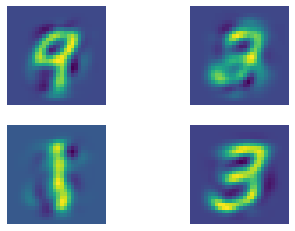

In [48]:
_, ax = plt.subplots(2,2)

ax[0, 0].imshow(X_RR[4].reshape(28, 28))
ax[0, 0].set_axis_off()
ax[0, 1].imshow(X_RR[5].reshape(28, 28))
ax[0, 1].set_axis_off()

ax[1, 0].imshow(X_RR[6].reshape(28, 28))
ax[1, 0].set_axis_off()
ax[1, 1].imshow(X_RR[7].reshape(28, 28))
ax[1, 1].set_axis_off()

plt.show()

In [49]:
print("Mean Square Error: ", mean_squared_error(X_train, X_RR))


Mean Square Error:  1.7828907465701942e-26


## For M = 64

In [51]:
model = PCA()
X_R = model.pca(X_train, 64)
X_R.shape

(60000, 64)

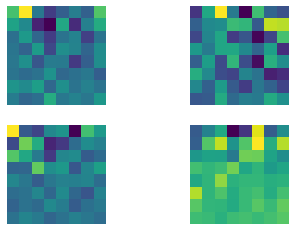

In [53]:
_, ax = plt.subplots(2,2)

ax[0, 0].imshow(X_R[4].reshape(8, 8))
ax[0, 0].set_axis_off()
ax[0, 1].imshow(X_R[5].reshape(8, 8))
ax[0, 1].set_axis_off()

ax[1, 0].imshow(X_R[6].reshape(8, 8))
ax[1, 0].set_axis_off()
ax[1, 1].imshow(X_R[7].reshape(8, 8))
ax[1, 1].set_axis_off()

plt.show()

In [54]:
X_RR = model.pca_reconstruct(X_R)
X_RR.shape

(60000, 784)

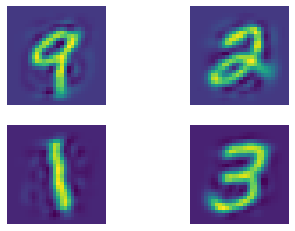

In [55]:
_, ax = plt.subplots(2,2)

ax[0, 0].imshow(X_RR[4].reshape(28, 28))
ax[0, 0].set_axis_off()
ax[0, 1].imshow(X_RR[5].reshape(28, 28))
ax[0, 1].set_axis_off()

ax[1, 0].imshow(X_RR[6].reshape(28, 28))
ax[1, 0].set_axis_off()
ax[1, 1].imshow(X_RR[7].reshape(28, 28))
ax[1, 1].set_axis_off()

plt.show()

In [56]:
print("Mean Square Error: ", mean_squared_error(X_train, X_RR))


Mean Square Error:  7.98595805535532e-27


## For M = 100

In [57]:
model = PCA()
X_R = model.pca(X_train, 100)
X_R.shape

(60000, 100)

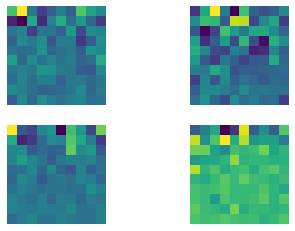

In [59]:
_, ax = plt.subplots(2,2)

ax[0, 0].imshow(X_R[4].reshape(10, 10))
ax[0, 0].set_axis_off()
ax[0, 1].imshow(X_R[5].reshape(10, 10))
ax[0, 1].set_axis_off()

ax[1, 0].imshow(X_R[6].reshape(10, 10))
ax[1, 0].set_axis_off()
ax[1, 1].imshow(X_R[7].reshape(10, 10))
ax[1, 1].set_axis_off()

plt.show()

In [60]:
X_RR = model.pca_reconstruct(X_R)
X_RR.shape

(60000, 784)

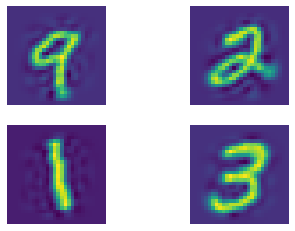

In [61]:
_, ax = plt.subplots(2,2)

ax[0, 0].imshow(X_RR[4].reshape(28, 28))
ax[0, 0].set_axis_off()
ax[0, 1].imshow(X_RR[5].reshape(28, 28))
ax[0, 1].set_axis_off()

ax[1, 0].imshow(X_RR[6].reshape(28, 28))
ax[1, 0].set_axis_off()
ax[1, 1].imshow(X_RR[7].reshape(28, 28))
ax[1, 1].set_axis_off()

plt.show()

In [62]:
print("Mean Square Error: ", mean_squared_error(X_train, X_RR))


Mean Square Error:  4.938687622389692e-27


## For M = 200

In [63]:
model = PCA()
X_R = model.pca(X_train, 200)
X_R.shape

(60000, 200)

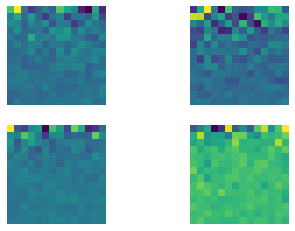

In [64]:
_, ax = plt.subplots(2,2)

ax[0, 0].imshow(X_R[4][:196].reshape(14, 14))
ax[0, 0].set_axis_off()
ax[0, 1].imshow(X_R[5][:196].reshape(14, 14))
ax[0, 1].set_axis_off()

ax[1, 0].imshow(X_R[6][:196].reshape(14, 14))
ax[1, 0].set_axis_off()
ax[1, 1].imshow(X_R[7][:196].reshape(14, 14))
ax[1, 1].set_axis_off()

plt.show()

In [65]:
X_RR = model.pca_reconstruct(X_R)
X_RR.shape

(60000, 784)

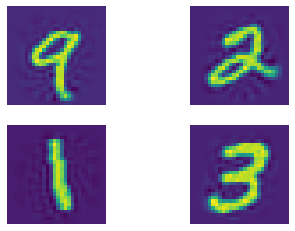

In [66]:
_, ax = plt.subplots(2,2)

ax[0, 0].imshow(X_RR[4].reshape(28, 28))
ax[0, 0].set_axis_off()
ax[0, 1].imshow(X_RR[5].reshape(28, 28))
ax[0, 1].set_axis_off()

ax[1, 0].imshow(X_RR[6].reshape(28, 28))
ax[1, 0].set_axis_off()
ax[1, 1].imshow(X_RR[7].reshape(28, 28))
ax[1, 1].set_axis_off()

plt.show()

In [ ]:
print("Mean Square Error: ", mean_squared_error(X_train, X_RR))

## For M = 784

In [68]:
model = PCA()
X_R = model.pca(X_train, 784)
X_R.shape

(60000, 784)

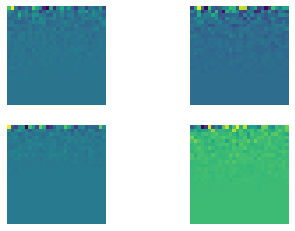

In [69]:
_, ax = plt.subplots(2,2)

ax[0, 0].imshow(X_R[4].reshape(28, 28))
ax[0, 0].set_axis_off()
ax[0, 1].imshow(X_R[5].reshape(28, 28))
ax[0, 1].set_axis_off()

ax[1, 0].imshow(X_R[6].reshape(28, 28))
ax[1, 0].set_axis_off()
ax[1, 1].imshow(X_R[7].reshape(28, 28))
ax[1, 1].set_axis_off()

plt.show()

In [70]:
X_RR = model.pca_reconstruct(X_R)
X_RR.shape

(60000, 784)

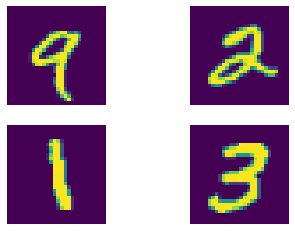

In [71]:
_, ax = plt.subplots(2,2)

ax[0, 0].imshow(X_RR[4].reshape(28, 28))
ax[0, 0].set_axis_off()
ax[0, 1].imshow(X_RR[5].reshape(28, 28))
ax[0, 1].set_axis_off()

ax[1, 0].imshow(X_RR[6].reshape(28, 28))
ax[1, 0].set_axis_off()
ax[1, 1].imshow(X_RR[7].reshape(28, 28))
ax[1, 1].set_axis_off()

plt.show()

In [72]:
print("Mean Square Error: ", mean_squared_error(X_train, X_RR))

Mean Square Error:  9.61614359566627e-52
